In [1]:
# import the libraries
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import Word

import matplotlib.pyplot as plt

import numpy as np
import re
import contractions

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

In [2]:
# reading the data
df = pd.read_csv("/kaggle/input/twitter-airline-sentiment/Tweets.csv")

In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14640 entries, 0 to 14639

Data columns (total 15 columns):

 #   Column                        Non-Null Count  Dtype  

---  ------                        --------------  -----  

 0   tweet_id                      14640 non-null  float64

 1   airline_sentiment             14640 non-null  object 

 2   airline_sentiment_confidence  14640 non-null  float64

 3   negativereason                9178 non-null   object 

 4   negativereason_confidence     10522 non-null  float64

 5   airline                       14640 non-null  object 

 6   airline_sentiment_gold        40 non-null     object 

 7   name                          14640 non-null  object 

 8   negativereason_gold           32 non-null     object 

 9   retweet_count                 14640 non-null  int64  

 10  text                          14640 non-null  object 

 11  tweet_coord                   1019 non-null   object 

 12  tweet_created                 14640 non-nul

In [6]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692605e+17,0.900169,0.638298,0.082650
std,8.098842e+14,0.162830,0.330440,0.745778
min,5.680000e+17,0.335000,0.000000,0.000000
25%,5.690000e+17,0.692300,0.360600,0.000000
50%,5.690000e+17,1.000000,0.670600,0.000000
75%,5.700000e+17,1.000000,1.000000,0.000000
max,5.700000e+17,1.000000,1.000000,44.000000


In [7]:
df.shape

(14640, 15)

In [8]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Data Visualization 

In [9]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
plt.rcParams["figure.autolayout"] = True

6.0

4.0


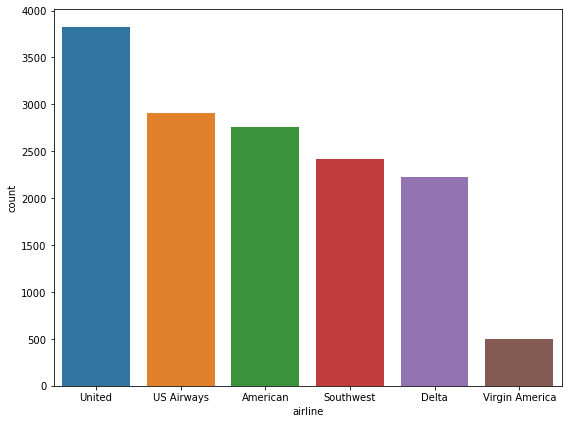

In [10]:
ax = sns.countplot(x = 'airline', data = df, order = df.airline.value_counts().index)

<AxesSubplot:ylabel='airline'>

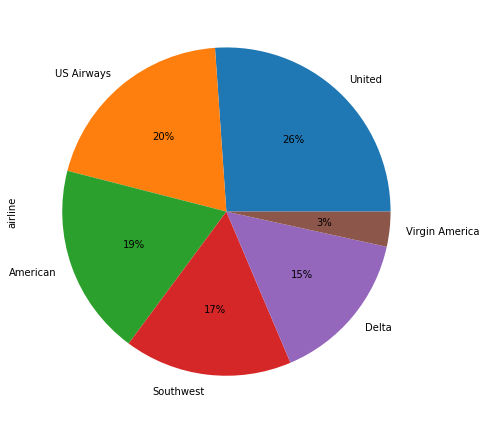

In [11]:
df.airline.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

<AxesSubplot:xlabel='airline_sentiment'>

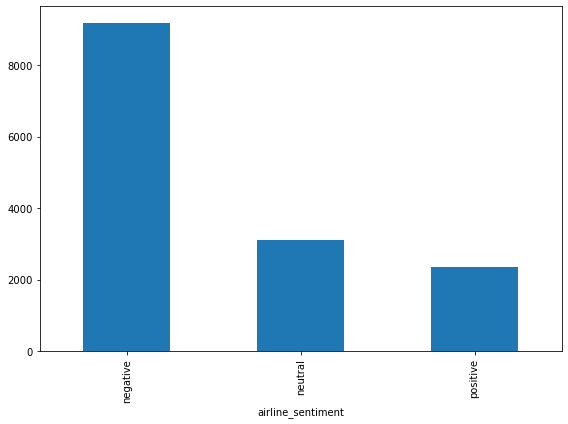

In [12]:
airline_sentiment = df.groupby(["airline_sentiment"]).airline_sentiment.count()
airline_sentiment.plot(kind = 'bar')

<AxesSubplot:ylabel='airline_sentiment'>

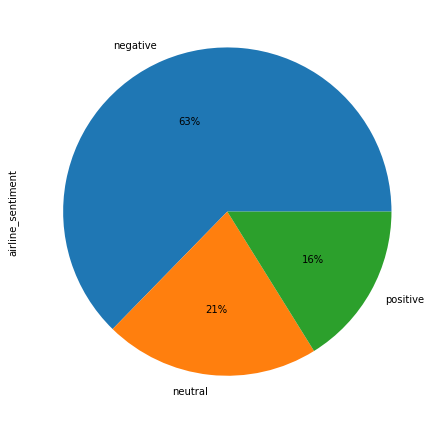

In [13]:
df.airline_sentiment.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

<AxesSubplot:xlabel='airline'>

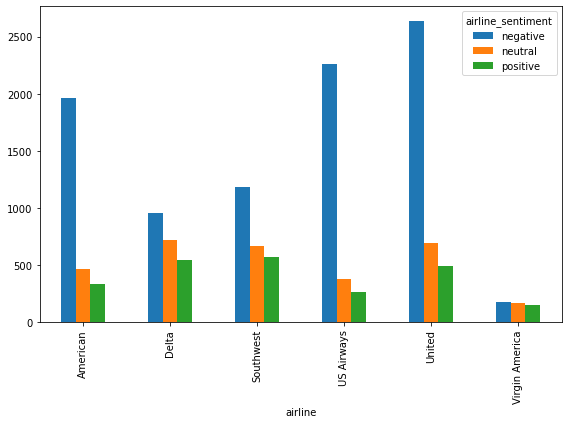

In [14]:
airline_sentiment = df.groupby(["airline", "airline_sentiment"]).airline_sentiment.count().unstack()
airline_sentiment.plot(kind = 'bar') # stacked = True 

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

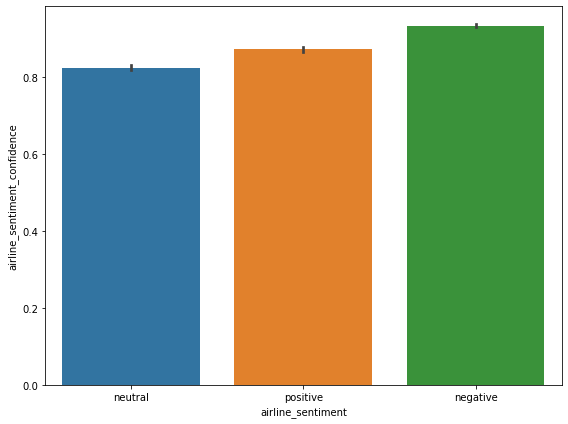

In [15]:
sns.barplot(x = 'airline_sentiment', y = 'airline_sentiment_confidence', data = df)

[Text(0, 0, 'Customer Service Issue'),
 Text(1, 0, 'Late Flight'),
 Text(2, 0, "Can't Tell"),
 Text(3, 0, 'Cancelled Flight'),
 Text(4, 0, 'Lost Luggage'),
 Text(5, 0, 'Bad Flight'),
 Text(6, 0, 'Flight Booking Problems'),
 Text(7, 0, 'Flight Attendant Complaints'),
 Text(8, 0, 'longlines'),
 Text(9, 0, 'Damaged Luggage')]

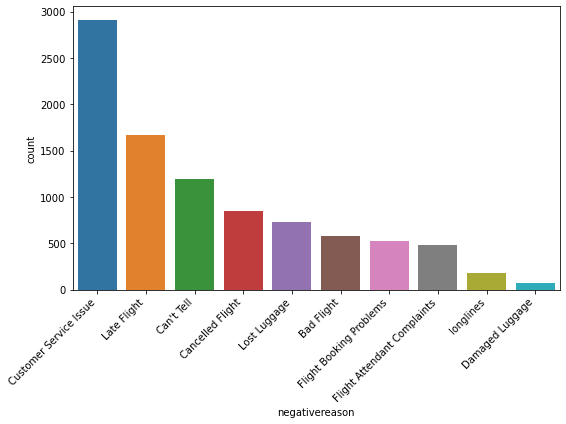

In [16]:
ax = sns.countplot(x = 'negativereason', data = df, order = df.negativereason.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

<AxesSubplot:ylabel='negativereason'>

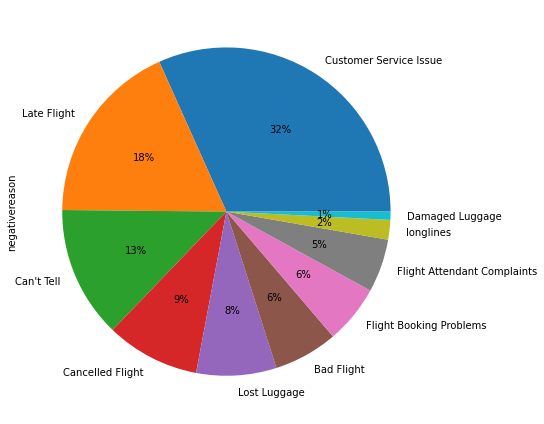

In [17]:
df.negativereason.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

[Text(0, 0, 'American'),
 Text(1, 0, 'Delta'),
 Text(2, 0, 'Southwest'),
 Text(3, 0, 'US Airways'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Virgin America')]

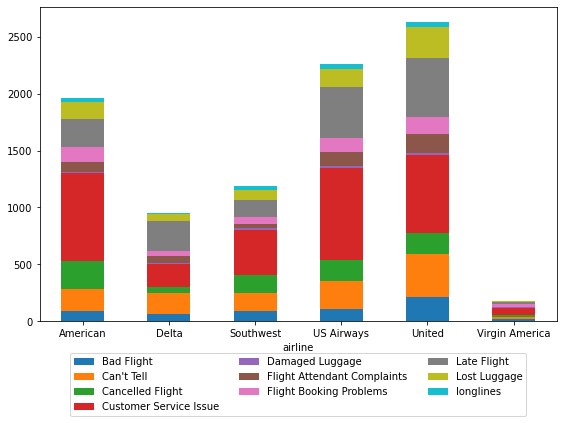

In [18]:
airline_sentiment = df.groupby(["airline", "negativereason"]).airline_sentiment.count().unstack()
ax = airline_sentiment.plot(kind = 'bar', stacked = True)
ax.legend(bbox_to_anchor=(0.5, -0.1), ncol = 3, loc='upper center', borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

In [19]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

(-0.5, 1599.5, 719.5, -0.5)

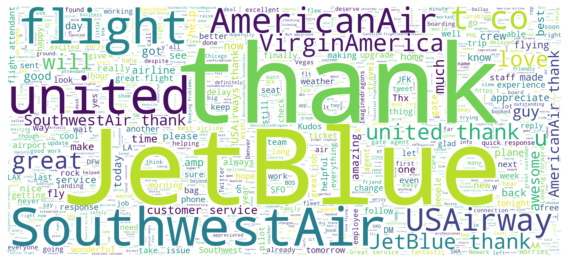

In [20]:
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720, background_color='white').generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
plt.axis('off')

(-0.5, 1599.5, 719.5, -0.5)

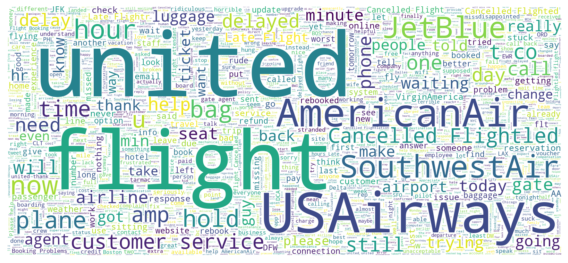

In [21]:
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720, background_color='white').generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 719.5, -0.5)

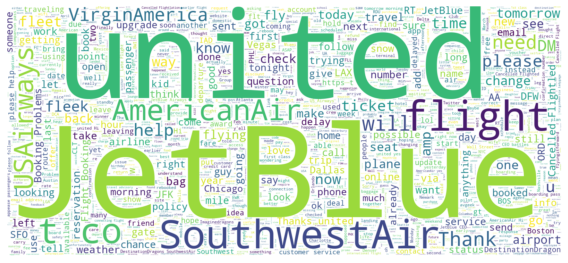

In [22]:
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720, background_color='white').generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
plt.axis('off')

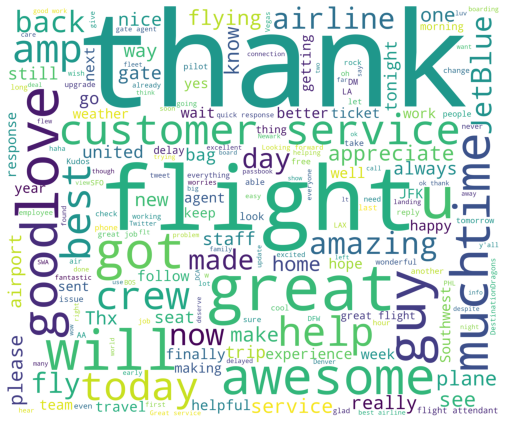

In [23]:
new_df=df[df.airline_sentiment =='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

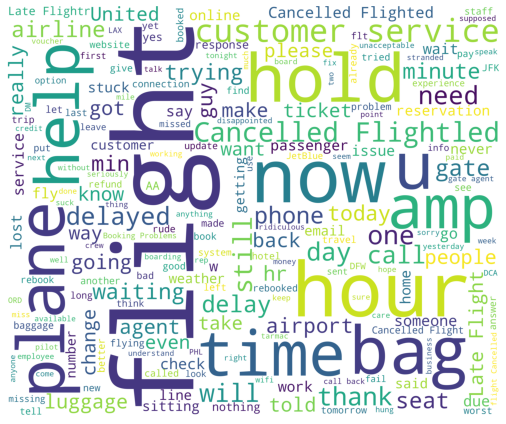

In [24]:
new_df=df[df.airline_sentiment =='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

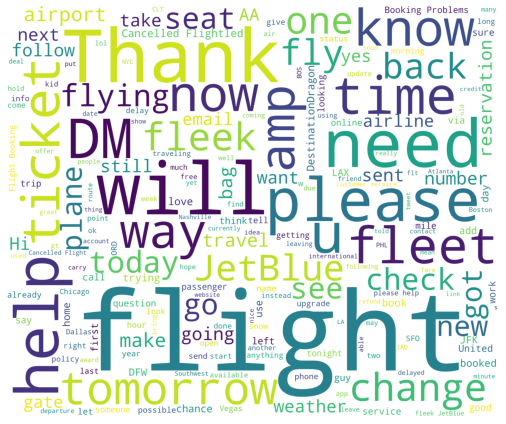

In [25]:
new_df=df[df.airline_sentiment =='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Preprocessing the Tweets

## 1. droping bad data and picking the features

In [3]:
# finding the low confidence data
confidence_threshold = 0.6
df.query('airline_sentiment_confidence < @confidence_threshold').index

Int64Index([    1,   114,   142,   183,   309,   349,   403,   462,   488,
              495,
            ...
            13930, 13997, 14020, 14075, 14078, 14261, 14297, 14414, 14530,
            14635],
           dtype='int64', length=238)

In [4]:
# dropping the low confidence data
df = df.drop(df.query('airline_sentiment_confidence < @confidence_threshold').index , axis = 0).reset_index(drop = True)

In [5]:
# selecting the features we need
df = pd.concat([df['text'], df['airline_sentiment']], axis = 1)
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica I didn't today... Must mean I n...,neutral
2,@VirginAmerica it's really aggressive to blast...,negative
3,@VirginAmerica and it's a really big bad thing...,negative
4,@VirginAmerica seriously would pay $30 a fligh...,negative
...,...,...
14397,@AmericanAir right on cue with the delays👌,negative
14398,@AmericanAir leaving over 20 minutes Late Flig...,negative
14399,@AmericanAir Please bring American Airlines to...,neutral
14400,"@AmericanAir you have my money, you change my ...",negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14402 entries, 0 to 14401

Data columns (total 2 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   text               14402 non-null  object

 1   airline_sentiment  14402 non-null  object

dtypes: object(2)

memory usage: 225.2+ KB


In [7]:
df.isna().sum().sum()

0

In [8]:
df['airline_sentiment'].value_counts()

negative    9113
neutral     2997
positive    2292
Name: airline_sentiment, dtype: int64

In [9]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [10]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [11]:
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica I didn't today... Must mean I n...,1
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0
...,...,...
14397,@AmericanAir right on cue with the delays👌,0
14398,@AmericanAir leaving over 20 minutes Late Flig...,0
14399,@AmericanAir Please bring American Airlines to...,1
14400,"@AmericanAir you have my money, you change my ...",0


## 2.lowercasing

In [12]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'][5:15]

5     @virginamerica yes, nearly every time i fly vx...
6     @virginamerica really missed a prime opportuni...
7       @virginamerica well, i didn't…but now i do! :-d
8     @virginamerica it was amazing, and arrived an ...
9     @virginamerica did you know that suicide is th...
10    @virginamerica i &lt;3 pretty graphics. so muc...
11    @virginamerica this is such a great deal! alre...
12    @virginamerica @virginmedia i'm flying your #f...
13                               @virginamerica thanks!
14        @virginamerica sfo-pdx schedule is still mia.
Name: text, dtype: object

## 3. expanding contraction

In [13]:
df['text'] = df['text'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df['text'][2]

'@virginamerica it is really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

 ## removing @usernames, url, html tags, punctuations and numerical values and emojis

In [14]:
# remove username
df['text'] = df['text'].str.replace('([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)','', regex=True)
# remove url
df['text'] = df['text'].str.replace(r'https?://\S+|www\.\S+','', regex=True)
# remove html
df['text'] = df['text'].str.replace(r'<.*?>','', regex=True)
# remove numerical value
df['text'] = df['text'].str.replace('[\d-]','', regex=True)
# remove punctuations
df['text'] = df['text'].str.replace('[^\w\s]','', regex=True)

df['text'][2] 
                                   

' it is really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse'

In [15]:
df['text'][14398]


' leaving over  minutes late flight no warnings or communication until we were  minutes late flight that is called shitty customer svc'

## 4.Lemmatizing

In [16]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text']

0                                                what said
1        i did not today must mean i need to take anoth...
2        it is really aggressive to blast obnoxious ent...
3                and it is a really big bad thing about it
4        seriously would pay a flight for seat that did...
                               ...                        
14397                          right on cue with the delay
14398    leaving over minute late flight no warning or ...
14399                     please bring american airline to
14400    you have my money you change my flight and do ...
14401    we have people so we need know how many seat a...
Name: text, Length: 14402, dtype: object

## 5.stemming

In [17]:
stem = PorterStemmer()
df['text'] = df['text'].apply(lambda x: " ".join([stem.stem(word) for word in x.split()]))
df['text']

0                                                what said
1        i did not today must mean i need to take anoth...
2        it is realli aggress to blast obnoxi entertain...
3                and it is a realli big bad thing about it
4        serious would pay a flight for seat that did n...
                               ...                        
14397                          right on cue with the delay
14398    leav over minut late flight no warn or commun ...
14399                       pleas bring american airlin to
14400    you have my money you chang my flight and do n...
14401    we have peopl so we need know how mani seat ar...
Name: text, Length: 14402, dtype: object

In [18]:
df['text'][2] 

'it is realli aggress to blast obnoxi entertain in your guest face amp they have littl recours'

In [19]:
df['text'][14398]

'leav over minut late flight no warn or commun until we were minut late flight that is call shitti custom svc'

## 6.removing stopwords

In [20]:
#nltk.download('stopwords')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text']

0                                                     said
1                     today must mean need take anoth trip
2        realli aggress blast obnoxi entertain guest fa...
3                                     realli big bad thing
4        serious would pay flight seat thi play realli ...
                               ...                        
14397                                      right cue delay
14398    leav minut late flight warn commun minut late ...
14399                          pleas bring american airlin
14400    money chang flight answer phone ani suggest ma...
14401    peopl need know mani seat next flight plz put ...
Name: text, Length: 14402, dtype: object

In [21]:
df['text'][1]

'today must mean need take anoth trip'

In [22]:
df['text'][2]

'realli aggress blast obnoxi entertain guest face amp littl recours'

In [23]:
df['text'][3]

'realli big bad thing'

In [24]:
x = df['text']
y = df['airline_sentiment']

# vectorize the text data

In [25]:
# Creating object of TF-IDF vectorizer
tfidf = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= tfidf.fit_transform(x)

In [26]:
y.value_counts()

0    9113
1    2997
2    2292
Name: airline_sentiment, dtype: int64

# splitting to train and test

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf,y, test_size=0.20, random_state=42)

# Training the preprocessed data

In [27]:
# function to calculate and print the model accuracy scores
def scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  
  accuracy = accuracy_score(y_pred,y_test)

  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, y_pred))

  print(classification_report(y_test,y_pred)) 

  train_accuracy = accuracy_score(y_train,predicted_class_train)

  print("Train accuracy score: ", train_accuracy)
  print("accuracy score: ",accuracy , '\n')

  return train_accuracy, accuracy 

# running the machine learning algorithms before smote

In [48]:
SVM = svm.SVC()
s_train_accuracy2, s_accuracy2 = scores(SVM,x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[7259   24   14]

 [ 334 1991   54]

 [ 121   51 1673]]

Test confusion matrix is: 

[[1731   53   32]

 [ 345  233   40]

 [ 157   36  254]]

              precision    recall  f1-score   support



           0       0.78      0.95      0.86      1816

           1       0.72      0.38      0.50       618

           2       0.78      0.57      0.66       447



    accuracy                           0.77      2881

   macro avg       0.76      0.63      0.67      2881

weighted avg       0.76      0.77      0.75      2881



Train accuracy score:  0.9480947834389376

accuracy score:  0.7698715723707046 




In [49]:
g_train_accuracy2, g_accuracy2 = scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

Train confusion matrix is: 

[[3958 1070 2269]

 [   0 1353 1026]

 [   0    0 1845]]

Test confusion matrix is: 

[[717 366 733]

 [ 96 184 338]

 [ 77  67 303]]

              precision    recall  f1-score   support



           0       0.81      0.39      0.53      1816

           1       0.30      0.30      0.30       618

           2       0.22      0.68      0.33       447



    accuracy                           0.42      2881

   macro avg       0.44      0.46      0.39      2881

weighted avg       0.61      0.42      0.45      2881



Train accuracy score:  0.6211266383126465

accuracy score:  0.417910447761194 




In [50]:
m_train_accuracy2, m_accuracy2 = scores(MultinomialNB(),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[7272   22    3]

 [1742  602   35]

 [1226   34  585]]

Test confusion matrix is: 

[[1806    8    2]

 [ 510   94   14]

 [ 349   15   83]]

              precision    recall  f1-score   support



           0       0.68      0.99      0.81      1816

           1       0.80      0.15      0.26       618

           2       0.84      0.19      0.30       447



    accuracy                           0.69      2881

   macro avg       0.77      0.44      0.46      2881

weighted avg       0.73      0.69      0.61      2881



Train accuracy score:  0.7342244596823192

accuracy score:  0.6883026726830962 




In [51]:
bnb_train_accuracy2, bnb_accuracy2 = scores(BernoulliNB(),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[7020  212   65]

 [ 949 1351   79]

 [ 470  139 1236]]

Test confusion matrix is: 

[[1684   98   34]

 [ 310  272   36]

 [ 162   66  219]]

              precision    recall  f1-score   support



           0       0.78      0.93      0.85      1816

           1       0.62      0.44      0.52       618

           2       0.76      0.49      0.60       447



    accuracy                           0.75      2881

   macro avg       0.72      0.62      0.65      2881

weighted avg       0.74      0.75      0.74      2881



Train accuracy score:  0.8338685877961982

accuracy score:  0.7549461992363763 




In [52]:
d_train_accuracy2, d_test_accuracy2= scores(DecisionTreeClassifier(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7288    9    0]

 [  19 2339   21]

 [   8   17 1820]]

Test confusion matrix is: 

[[1533  171  112]

 [ 294  258   66]

 [ 146   59  242]]

              precision    recall  f1-score   support



           0       0.78      0.84      0.81      1816

           1       0.53      0.42      0.47       618

           2       0.58      0.54      0.56       447



    accuracy                           0.71      2881

   macro avg       0.63      0.60      0.61      2881

weighted avg       0.69      0.71      0.70      2881



Train accuracy score:  0.993576946445621

accuracy score:  0.7056577577230129 




In [53]:
r_train_accuracy2, r_test_accuracy2= scores(RandomForestClassifier(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7274   22    1]

 [   6 2348   25]

 [   3   17 1825]]

Test confusion matrix is: 

[[1705   77   34]

 [ 299  269   50]

 [ 170   36  241]]

              precision    recall  f1-score   support



           0       0.78      0.94      0.85      1816

           1       0.70      0.44      0.54       618

           2       0.74      0.54      0.62       447



    accuracy                           0.77      2881

   macro avg       0.74      0.64      0.67      2881

weighted avg       0.76      0.77      0.75      2881



Train accuracy score:  0.993576946445621

accuracy score:  0.7688302672683096 




In [54]:
k_train_accuracy2, k_accuracy2= scores(KNeighborsClassifier(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[5887 1294  116]

 [ 723 1583   73]

 [ 633  484  728]]

Test confusion matrix is: 

[[1083  663   70]

 [ 280  306   32]

 [ 191  161   95]]

              precision    recall  f1-score   support



           0       0.70      0.60      0.64      1816

           1       0.27      0.50      0.35       618

           2       0.48      0.21      0.30       447



    accuracy                           0.52      2881

   macro avg       0.48      0.43      0.43      2881

weighted avg       0.57      0.52      0.53      2881



Train accuracy score:  0.7115701761999826

accuracy score:  0.5150989239847276 




In [55]:
l_train_accuracy2, l_accuracy2= scores(LogisticRegression(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7080  153   64]

 [ 738 1554   87]

 [ 329  150 1366]]

Test confusion matrix is: 

[[1696   87   33]

 [ 280  300   38]

 [ 129   71  247]]

              precision    recall  f1-score   support



           0       0.81      0.93      0.87      1816

           1       0.66      0.49      0.56       618

           2       0.78      0.55      0.65       447



    accuracy                           0.78      2881

   macro avg       0.75      0.66      0.69      2881

weighted avg       0.77      0.78      0.77      2881



Train accuracy score:  0.8679802100512108

accuracy score:  0.7785491148906629 




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


In [56]:
a_train_accuracy2, a_accuracy2= scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[6945   87  265]

 [2006  162  211]

 [ 624   33 1188]]

Test confusion matrix is: 

[[1730   13   73]

 [ 526   34   58]

 [ 184    6  257]]

              precision    recall  f1-score   support



           0       0.71      0.95      0.81      1816

           1       0.64      0.06      0.10       618

           2       0.66      0.57      0.62       447



    accuracy                           0.70      2881

   macro avg       0.67      0.53      0.51      2881

weighted avg       0.69      0.70      0.63      2881



Train accuracy score:  0.7199895842374794

accuracy score:  0.7014925373134329 




In [57]:
b_train_accuracy2, b_accuracy2= scores(BaggingClassifier(base_estimator = BernoulliNB()),x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[7015  211   71]

 [ 985 1312   82]

 [ 500  132 1213]]

Test confusion matrix is: 

[[1693   88   35]

 [ 321  256   41]

 [ 175   57  215]]

              precision    recall  f1-score   support



           0       0.77      0.93      0.85      1816

           1       0.64      0.41      0.50       618

           2       0.74      0.48      0.58       447



    accuracy                           0.75      2881

   macro avg       0.72      0.61      0.64      2881

weighted avg       0.74      0.75      0.73      2881



Train accuracy score:  0.8280531203888551

accuracy score:  0.7511280805275946 




# handeling imbalance

In [28]:
# smote = Synthetic Minority Oversampling Technique
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_tf_idf,y)

In [29]:
y_sm.value_counts()

0    9113
1    9113
2    9113
Name: airline_sentiment, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size=0.20, random_state=42)

# running the machine learning algorithms after smote

In [31]:
SVM = svm.SVC()
s_train_accuracy1, s_accuracy1 = scores(SVM,x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[7280   25    9]

 [  94 7068  154]

 [  31  781 6429]]

Test confusion matrix is: 

[[1700   65   34]

 [ 243 1501   53]

 [ 102  220 1550]]

              precision    recall  f1-score   support



           0       0.83      0.94      0.88      1799

           1       0.84      0.84      0.84      1797

           2       0.95      0.83      0.88      1872



    accuracy                           0.87      5468

   macro avg       0.87      0.87      0.87      5468

weighted avg       0.87      0.87      0.87      5468



Train accuracy score:  0.9499794248091079

accuracy score:  0.8688734455010972 




In [32]:
g_train_accuracy1, g_accuracy1 = scores(GaussianNB(),x_train.toarray(), x_test.toarray(), y_train, y_test)

Train confusion matrix is: 

[[3740 1180 2394]

 [   0 4144 3172]

 [   0    5 7236]]

Test confusion matrix is: 

[[ 602  445  752]

 [  28  951  818]

 [  24   33 1815]]

              precision    recall  f1-score   support



           0       0.92      0.33      0.49      1799

           1       0.67      0.53      0.59      1797

           2       0.54      0.97      0.69      1872



    accuracy                           0.62      5468

   macro avg       0.71      0.61      0.59      5468

weighted avg       0.71      0.62      0.59      5468



Train accuracy score:  0.6913264139728408

accuracy score:  0.6159473299195318 




In [33]:
m_train_accuracy1, m_accuracy1 = scores(MultinomialNB(),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[6665  409  240]

 [1469 5303  544]

 [ 604  398 6239]]

Test confusion matrix is: 

[[1532  180   87]

 [ 407 1228  162]

 [ 197  121 1554]]

              precision    recall  f1-score   support



           0       0.72      0.85      0.78      1799

           1       0.80      0.68      0.74      1797

           2       0.86      0.83      0.85      1872



    accuracy                           0.79      5468

   macro avg       0.79      0.79      0.79      5468

weighted avg       0.79      0.79      0.79      5468



Train accuracy score:  0.8324722234922958

accuracy score:  0.7889539136795903 




In [34]:
bnb_train_accuracy1, bnb_accuracy1 = scores(BernoulliNB(),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[5996  880  438]

 [ 631 6034  651]

 [ 259  413 6569]]

Test confusion matrix is: 

[[1364  288  147]

 [ 186 1434  177]

 [  81  126 1665]]

              precision    recall  f1-score   support



           0       0.84      0.76      0.80      1799

           1       0.78      0.80      0.79      1797

           2       0.84      0.89      0.86      1872



    accuracy                           0.82      5468

   macro avg       0.82      0.82      0.81      5468

weighted avg       0.82      0.82      0.82      5468



Train accuracy score:  0.8503955008915917

accuracy score:  0.8162033650329188 




In [35]:
d_train_accuracy1, d_test_accuracy1= scores(DecisionTreeClassifier(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7296   16    2]

 [   8 7243   65]

 [   4   26 7211]]

Test confusion matrix is: 

[[1352  289  158]

 [ 214 1442  141]

 [ 110  144 1618]]

              precision    recall  f1-score   support



           0       0.81      0.75      0.78      1799

           1       0.77      0.80      0.79      1797

           2       0.84      0.86      0.85      1872



    accuracy                           0.81      5468

   macro avg       0.81      0.81      0.81      5468

weighted avg       0.81      0.81      0.81      5468



Train accuracy score:  0.9944675597823602

accuracy score:  0.8068763716166789 




In [36]:
r_train_accuracy1, r_test_accuracy1= scores(RandomForestClassifier(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7292   19    3]

 [   5 7237   74]

 [   3   17 7221]]

Test confusion matrix is: 

[[1498  215   86]

 [ 129 1600   68]

 [  47   86 1739]]

              precision    recall  f1-score   support



           0       0.89      0.83      0.86      1799

           1       0.84      0.89      0.87      1797

           2       0.92      0.93      0.92      1872



    accuracy                           0.88      5468

   macro avg       0.89      0.88      0.88      5468

weighted avg       0.89      0.88      0.88      5468



Train accuracy score:  0.9944675597823602

accuracy score:  0.8846013167520117 




In [37]:
k_train_accuracy1, k_accuracy1= scores(KNeighborsClassifier(), x_train,x_test,y_train,y_test)
# KNeighborsClassifier().fit(x_train, y_train)

Train confusion matrix is: 

[[ 621 5214 1479]

 [   9 6753  554]

 [   7  407 6827]]

Test confusion matrix is: 

[[  64 1189  546]

 [   7 1547  243]

 [   2  212 1658]]

              precision    recall  f1-score   support



           0       0.88      0.04      0.07      1799

           1       0.52      0.86      0.65      1797

           2       0.68      0.89      0.77      1872



    accuracy                           0.60      5468

   macro avg       0.69      0.59      0.50      5468

weighted avg       0.69      0.60      0.50      5468



Train accuracy score:  0.6493073019066343

accuracy score:  0.5978419897585955 




In [38]:
l_train_accuracy1, l_accuracy1= scores(LogisticRegression(), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[6490  567  257]

 [ 510 6469  337]

 [ 215 1172 5854]]

Test confusion matrix is: 

[[1448  249  102]

 [ 149 1546  102]

 [  69  341 1462]]

              precision    recall  f1-score   support



           0       0.87      0.80      0.84      1799

           1       0.72      0.86      0.79      1797

           2       0.88      0.78      0.83      1872



    accuracy                           0.81      5468

   macro avg       0.82      0.82      0.82      5468

weighted avg       0.82      0.81      0.82      5468



Train accuracy score:  0.8601801472269215

accuracy score:  0.8149231894659839 




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


In [39]:
a_train_accuracy1, a_accuracy1= scores(AdaBoostClassifier(),x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[4980 1907  427]

 [ 866 5604  846]

 [ 449 1426 5366]]

Test confusion matrix is: 

[[1156  529  114]

 [ 220 1371  206]

 [ 120  363 1389]]

              precision    recall  f1-score   support



           0       0.77      0.64      0.70      1799

           1       0.61      0.76      0.68      1797

           2       0.81      0.74      0.78      1872



    accuracy                           0.72      5468

   macro avg       0.73      0.72      0.72      5468

weighted avg       0.73      0.72      0.72      5468



Train accuracy score:  0.7292762105070641

accuracy score:  0.7161667885881492 




In [40]:
b_train_accuracy1, b_accuracy1= scores(BaggingClassifier(base_estimator = BernoulliNB()),x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[5964  901  449]

 [ 643 6002  671]

 [ 261  417 6563]]

Test confusion matrix is: 

[[1371  283  145]

 [ 180 1437  180]

 [  81  127 1664]]

              precision    recall  f1-score   support



           0       0.84      0.76      0.80      1799

           1       0.78      0.80      0.79      1797

           2       0.84      0.89      0.86      1872



    accuracy                           0.82      5468

   macro avg       0.82      0.82      0.82      5468

weighted avg       0.82      0.82      0.82      5468



Train accuracy score:  0.8471949156417173

accuracy score:  0.8178493050475494 




In [73]:
import dataframe_image as dfi

data = [
    ('SVM', s_accuracy2, s_accuracy1),
    ('GaussianNB', g_accuracy2, g_accuracy1),
    ('MultinomialNB', m_accuracy2, m_accuracy1),
    ('BernouliNB', bnb_accuracy2, bnb_accuracy1),
    ('Bagging', b_accuracy2, b_accuracy1),
    ('AdaBoost', a_accuracy2, a_accuracy1),
    ('Logistic Regression', l_accuracy2, l_accuracy1),
    ('KNeighbors', k_accuracy2, k_accuracy1),
    ('Random Forest', r_test_accuracy2, r_test_accuracy1),
    ('Decision Tree', d_test_accuracy2, d_test_accuracy1)
]

Scores_ =pd.DataFrame(data, columns=['Model Name', 'imbalanced Accuracy', 'balanced Accuracy'])
Scores_.style.background_gradient().set_properties(**{'text-align': 'center'})

dfi.export(Scores_,"mytable13.png")
Scores_

,Model Name,imbalanced Accuracy,balanced Accuracy
0,SVM,0.769872,0.867959
1,GaussianNB,0.417910,0.620519
2,MultinomialNB,0.688303,0.799195
3,BernouliNB,0.754946,0.819129
4,Bagging,0.751128,0.818581
5,AdaBoost,0.701493,0.718178
6,Logistic Regression,0.778549,0.813094
7,KNeighbors,0.515099,0.590344
8,Random Forest,0.768830,0.884784
9,Decision Tree,0.705658,0.802670


# Grid search cv for tuning the hyperparameters

In [87]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='accuracy')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

In [84]:
# Decision Tree Classifier
param_grid = {'max_depth': [1, 2, 10, 50, 100, 500, 1000],
              'random_state': [0, 42, 100, 500],
              'max_leaf_nodes': [2, 50, 100, 1000],
              'max_features': ['sqrt', 'log2'],
              'min_samples_split' : [2, 10, 50, 100]
             }

dt_optimal = grid_search(DecisionTreeClassifier(),param_grid, x_train, y_train)

Fitting 2 folds for each of 896 candidates, totalling 1792 fits

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=0; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=0; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=42; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=42; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=100; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=100; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=500; total time=   0.0s

[CV] END max_depth=1, max_features=sqrt, max_leaf_nodes=2, min_samples_split=2, random_state=500; total time=   0.0

In [42]:
# Random Forest Classifier
param_grid = {'n_estimators': [5, 10, 100, 1000],
              'max_depth': [1, 10, 50, 100],
              'class_weight': ['balanced']
              
             } # 'max_features': ['sqrt', 'log2'],

rf_optimal = grid_search(RandomForestClassifier(),param_grid, x_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits

[CV] END .class_weight=balanced, max_depth=1, n_estimators=5; total time=   0.0s

[CV] END .class_weight=balanced, max_depth=1, n_estimators=5; total time=   0.0s

[CV] END class_weight=balanced, max_depth=1, n_estimators=10; total time=   0.0s

[CV] END class_weight=balanced, max_depth=1, n_estimators=10; total time=   0.0s

[CV] END class_weight=balanced, max_depth=1, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=1, n_estimators=100; total time=   0.2s

[CV] END class_weight=balanced, max_depth=1, n_estimators=1000; total time=   2.4s

[CV] END class_weight=balanced, max_depth=1, n_estimators=1000; total time=   2.4s

[CV] END class_weight=balanced, max_depth=10, n_estimators=5; total time=   0.0s

[CV] END class_weight=balanced, max_depth=10, n_estimators=5; total time=   0.0s

[CV] END class_weight=balanced, max_depth=10, n_estimators=10; total time=   0.1s

[CV] END class_weight=balance

In [77]:
# K Neighbors Classifier
param_grid = {'n_neighbors': list(range(1,30)),
              'leaf_size' : list(range(1,50)),
              'p': [1,2]
              #'weights' : ['uniform', 'distance'],
              #'metric' : ['euclidean', 'manhattan', 'minkowski'],
#               'algorithm': ['auto' , 'brute'] 
             } # , 'ball_tree', 'kd_tree'

knn_optimal = grid_search(KNeighborsClassifier(),param_grid, x_train, y_train)

Fitting 2 folds for each of 2842 candidates, totalling 5684 fits

[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   1.8s

[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   1.6s

[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   1.3s

[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   1.2s

[CV] END ....................leaf_size=1, n_neighbors=2, p=1; total time=   1.6s

[CV] END ....................leaf_size=1, n_neighbors=2, p=1; total time=   1.6s

[CV] END ....................leaf_size=1, n_neighbors=2, p=2; total time=   1.3s

[CV] END ....................leaf_size=1, n_neighbors=2, p=2; total time=   1.2s

[CV] END ....................leaf_size=1, n_neighbors=3, p=1; total time=   1.7s

[CV] END ....................leaf_size=1, n_neighbors=3, p=1; total time=   1.7s

[CV] END ....................leaf_size=1, n_neighbors=3, p=2; total time=   1.3s

[CV] END ....................lea

In [88]:
# Logistic Regression
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
             'max_iter':[100, 500]}

lr_optimal = grid_search(LogisticRegression(),param_grid, x_train, y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits

[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s

[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s

[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.3s

[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s

[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   3.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s

[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ..C=100, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=100, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=100, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=100, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=100, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s

[CV] END ..C=100, max_iter=500, penalty=l1, solver=liblinear; total time=   0.1s

[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.3s

[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s

[CV] END ......C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   1.2s

[CV] END ......C

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=100, max_iter=500, penalty=none, solver=newton-cg; total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=100, max_iter=500, penalty=none, solver=newton-cg; total time=   3.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ....C=100, max_iter=500, penalty=none, solver=lbfgs; total time=   1.8s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=100, max_iter=500, penalty=none, solver=lbfgs; total time=   1.8s

[CV] END C=100, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=100, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s

[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   2.6s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   3.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s

[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ...C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ...C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.2s

[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s

[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s

[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.7s

[CV] END .......

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .C=10, max_iter=500, penalty=none, solver=newton-cg; total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .C=10, max_iter=500, penalty=none, solver=newton-cg; total time=   3.1s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END .....C=10, max_iter=500, penalty=none, solver=lbfgs; total time=   1.5s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END .....C=10, max_iter=500, penalty=none, solver=lbfgs; total time=   1.5s

[CV] END .C=10, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END .C=10, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=1.0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=1.0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s

[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=none, solver=newton-cg; total time=   2.4s

[CV] END C=1.0, max_iter=100, penalty=none, solver=newton-cg; total time=   3.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s

[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=1.0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=1.0, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ..C=1.0, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ......C=1.0, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.2s

[CV] END ......C

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=500, penalty=none, solver=lbfgs; total time=   1.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=500, penalty=none, solver=lbfgs; total time=   1.6s

[CV] END C=1.0, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=1.0, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END ......C

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   3.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.2s

[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END ......C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ......C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END ......C

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.1, max_iter=500, penalty=none, solver=newton-cg; total time=   2.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.1, max_iter=500, penalty=none, solver=newton-cg; total time=   3.2s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ....C=0.1, max_iter=500, penalty=none, solver=lbfgs; total time=   1.7s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ....C=0.1, max_iter=500, penalty=none, solver=lbfgs; total time=   1.6s

[CV] END C=0.1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=0.1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s

[CV] END .....C=

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   3.4s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.2s

[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s

[CV] END .....C=0.01, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .....C=0.01, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END .C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END .....

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.01, max_iter=500, penalty=none, solver=newton-cg; total time=   2.3s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END C=0.01, max_iter=500, penalty=none, solver=newton-cg; total time=   3.5s


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters

  warnings.warn(


[CV] END ...C=0.01, max_iter=500, penalty=none, solver=lbfgs; total time=   1.8s

[CV] END ...C=0.01, max_iter=500, penalty=none, solver=lbfgs; total time=   1.8s

[CV] END C=0.01, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=0.01, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s





Best parameters are: 

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 

120 fits failed out of a total of 240.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

20 fits failed with the

In [46]:
# AdaBoost Classifier
params = {'n_estimators': [1, 10, 50, 100, 500, 1000],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

ada_optimal_model = grid_search(AdaBoostClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=1; total time=   0.0s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=1; total time=   0.0s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.7s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=10; total time=   0.7s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   3.6s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=50; total time=   3.5s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   7.2s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=100; total time=   7.2s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  37.6s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=500; total time=  37.3s

[CV] END algorithm=SAMME, learning_rate=0.0001, n_estimators=1000; total time= 1.3min

In [40]:
# Bagging Classifier
params = { 'base_estimator': [MultinomialNB(), BernoulliNB()],
          'n_estimators': [1, 10, 100, 500, 1000]
         }

b_optimal_model = grid_search(BaggingClassifier(), params,x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits

[CV] END .....base_estimator=MultinomialNB(), n_estimators=1; total time=   0.0s

[CV] END .....base_estimator=MultinomialNB(), n_estimators=1; total time=   0.0s

[CV] END ....base_estimator=MultinomialNB(), n_estimators=10; total time=   0.0s

[CV] END ....base_estimator=MultinomialNB(), n_estimators=10; total time=   0.0s

[CV] END ...base_estimator=MultinomialNB(), n_estimators=100; total time=   0.5s

[CV] END ...base_estimator=MultinomialNB(), n_estimators=100; total time=   0.5s

[CV] END ...base_estimator=MultinomialNB(), n_estimators=500; total time=   2.8s

[CV] END ...base_estimator=MultinomialNB(), n_estimators=500; total time=   2.8s

[CV] END ..base_estimator=MultinomialNB(), n_estimators=1000; total time=   5.5s

[CV] END ..base_estimator=MultinomialNB(), n_estimators=1000; total time=   5.5s

[CV] END .......base_estimator=BernoulliNB(), n_estimators=1; total time=   0.0s

[CV] END .......base_estimator=Berno

In [104]:
# Bernoulli NB
params = {'alpha': range(0,100),
         'binarize' :(0,100) }

bnb_optimal_model = grid_search(BernoulliNB(), params,x_train, y_train)

Fitting 2 folds for each of 200 candidates, totalling 400 fits

[CV] END ................................alpha=0, binarize=0; total time=   0.0s

[CV] END ................................alpha=0, binarize=0; total time=   0.0s

[CV] END ..............................alpha=0, binarize=100; total time=   0.0s

[CV] END ..............................alpha=0, binarize=100; total time=   0.0s

[CV] END ................................alpha=1, binarize=0; total time=   0.0s

[CV] END ................................alpha=1, binarize=0; total time=   0.0s

[CV] END ..............................alpha=1, binarize=100; total time=   0.0s

[CV] END ..............................alpha=1, binarize=100; total time=   0.0s

[CV] END ................................alpha=2, binarize=0; total time=   0.0s

[CV] END ................................alpha=2, binarize=0; total time=   0.0s

[CV] END ..............................alpha=2, binarize=100; total time=   0.0s

[CV] END .........................

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


[CV] END ................................alpha=9, binarize=0; total time=   0.0s

[CV] END ..............................alpha=9, binarize=100; total time=   0.0s

[CV] END ..............................alpha=9, binarize=100; total time=   0.0s

[CV] END ...............................alpha=10, binarize=0; total time=   0.0s

[CV] END ...............................alpha=10, binarize=0; total time=   0.0s

[CV] END .............................alpha=10, binarize=100; total time=   0.0s

[CV] END .............................alpha=10, binarize=100; total time=   0.0s

[CV] END ...............................alpha=11, binarize=0; total time=   0.0s

[CV] END ...............................alpha=11, binarize=0; total time=   0.0s

[CV] END .............................alpha=11, binarize=100; total time=   0.0s

[CV] END .............................alpha=11, binarize=100; total time=   0.0s

[CV] END ...............................alpha=12, binarize=0; total time=   0.0s

[CV] END .......

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


In [97]:
# Multinomial NB
params = {'alpha': range(0,100)}

mnb_optimal_model = grid_search(MultinomialNB(), params,x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits

[CV] END ............................................alpha=0; total time=   0.0s

[CV] END ............................................alpha=0; total time=   0.0s

[CV] END ............................................alpha=1; total time=   0.0s

[CV] END ............................................alpha=1; total time=   0.0s

[CV] END ............................................alpha=2; total time=   0.0s

[CV] END ............................................alpha=2; total time=   0.0s

[CV] END ............................................alpha=3; total time=   0.0s

[CV] END ............................................alpha=3; total time=   0.0s

[CV] END ............................................alpha=4; total time=   0.0s

[CV] END ............................................alpha=4; total time=   0.0s

[CV] END ............................................alpha=5; total time=   0.0s

[CV] END .........................

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


[CV] END ...........................................alpha=21; total time=   0.0s

[CV] END ...........................................alpha=21; total time=   0.0s

[CV] END ...........................................alpha=22; total time=   0.0s

[CV] END ...........................................alpha=22; total time=   0.0s

[CV] END ...........................................alpha=23; total time=   0.0s

[CV] END ...........................................alpha=23; total time=   0.0s

[CV] END ...........................................alpha=24; total time=   0.0s

[CV] END ...........................................alpha=24; total time=   0.0s

[CV] END ...........................................alpha=25; total time=   0.0s

[CV] END ...........................................alpha=25; total time=   0.0s

[CV] END ...........................................alpha=26; total time=   0.0s

[CV] END ...........................................alpha=26; total time=   0.0s

[CV] END .......

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


In [54]:
# Gaussian NB
params = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_optimal_model = grid_search(GaussianNB(), params,x_train.toarray(), y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits

[CV] END ..................................var_smoothing=1.0; total time=   3.5s

[CV] END ..................................var_smoothing=1.0; total time=   3.4s

[CV] END ...................var_smoothing=0.8111308307896871; total time=   3.2s

[CV] END ...................var_smoothing=0.8111308307896871; total time=   3.1s

[CV] END ....................var_smoothing=0.657933224657568; total time=   3.0s

[CV] END ....................var_smoothing=0.657933224657568; total time=   3.0s

[CV] END ....................var_smoothing=0.533669923120631; total time=   3.1s

[CV] END ....................var_smoothing=0.533669923120631; total time=   3.4s

[CV] END ..................var_smoothing=0.43287612810830584; total time=   3.1s

[CV] END ..................var_smoothing=0.43287612810830584; total time=   3.1s

[CV] END ...................var_smoothing=0.3511191734215131; total time=   3.5s

[CV] END ...................var_sm

# running the machine learning algorithms + optimization

# SVM

In [41]:
# 90, degree=3
SVM = svm.SVC( kernel='rbf', gamma='scale', C=10, probability=True, class_weight='balanced')
s_train_accuracy, s_accuracy = scores(SVM,x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[7288   22    4]

 [   2 7200  114]

 [   3  382 6856]]

Test confusion matrix is: 

[[1651  102   46]

 [ 136 1614   47]

 [  51  126 1695]]

              precision    recall  f1-score   support



           0       0.90      0.92      0.91      1799

           1       0.88      0.90      0.89      1797

           2       0.95      0.91      0.93      1872



    accuracy                           0.91      5468

   macro avg       0.91      0.91      0.91      5468

weighted avg       0.91      0.91      0.91      5468



Train accuracy score:  0.9759041653330894

accuracy score:  0.9070958302852963 




# Gaussian naive baye

In [42]:
g_train_accuracy, g_accuracy = scores(GaussianNB(var_smoothing = 0.0015199110829529332),x_train.toarray(), x_test.toarray(), y_train, y_test)

Train confusion matrix is: 

[[5057 1189 1068]

 [  95 4383 2838]

 [  24  133 7084]]

Test confusion matrix is: 

[[ 933  488  378]

 [  60  972  765]

 [  36   78 1758]]

              precision    recall  f1-score   support



           0       0.91      0.52      0.66      1799

           1       0.63      0.54      0.58      1797

           2       0.61      0.94      0.74      1872



    accuracy                           0.67      5468

   macro avg       0.71      0.67      0.66      5468

weighted avg       0.71      0.67      0.66      5468



Train accuracy score:  0.7555210095560331

accuracy score:  0.6698975859546452 




# Multinomial Naive Baye

In [43]:
m_train_accuracy, m_accuracy = scores(MultinomialNB(alpha = 0, fit_prior = True, class_prior=None),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[6641  469  204]

 [ 861 5996  459]

 [ 280  386 6575]]

Test confusion matrix is: 

[[1443  262   94]

 [ 250 1414  133]

 [ 111  134 1627]]

              precision    recall  f1-score   support



           0       0.80      0.80      0.80      1799

           1       0.78      0.79      0.78      1797

           2       0.88      0.87      0.87      1872



    accuracy                           0.82      5468

   macro avg       0.82      0.82      0.82      5468

weighted avg       0.82      0.82      0.82      5468



Train accuracy score:  0.8784234831512048

accuracy score:  0.8200438917337235 




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


# Bernouli naive bayes

In [44]:
bnb_train_accuracy, bnb_accuracy = scores(BernoulliNB(alpha = 0, binarize = 0, fit_prior = True, class_prior=None),x_train, x_test, y_train, y_test)

Train confusion matrix is: 

[[6386  636  292]

 [ 537 6248  531]

 [ 194  361 6686]]

Test confusion matrix is: 

[[1417  274  108]

 [ 166 1483  148]

 [  75  113 1684]]

              precision    recall  f1-score   support



           0       0.85      0.79      0.82      1799

           1       0.79      0.83      0.81      1797

           2       0.87      0.90      0.88      1872



    accuracy                           0.84      5468

   macro avg       0.84      0.84      0.84      5468

weighted avg       0.84      0.84      0.84      5468



Train accuracy score:  0.8833615289652965

accuracy score:  0.8383321141185077 




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10

  warnings.warn(


# Bagging Classifier

In [45]:
model = BaggingClassifier(base_estimator = BernoulliNB(),
                          n_estimators = 100)

b_train_accuracy, b_accuracy= scores(model,x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[5964  900  450]

 [ 626 6031  659]

 [ 258  418 6565]]

Test confusion matrix is: 

[[1370  286  143]

 [ 183 1431  183]

 [  82  124 1666]]

              precision    recall  f1-score   support



           0       0.84      0.76      0.80      1799

           1       0.78      0.80      0.79      1797

           2       0.84      0.89      0.86      1872



    accuracy                           0.82      5468

   macro avg       0.82      0.82      0.82      5468

weighted avg       0.82      0.82      0.82      5468



Train accuracy score:  0.8486123176809474

accuracy score:  0.8169348939283102 




# Ada Boost

In [46]:
a_train_accuracy, a_accuracy= scores(AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1.0, n_estimators= 1000),x_train,x_test, y_train, y_test)

Train confusion matrix is: 

[[6186  949  179]

 [ 718 5976  622]

 [ 215  802 6224]]

Test confusion matrix is: 

[[1375  325   99]

 [ 190 1437  170]

 [  98  260 1514]]

              precision    recall  f1-score   support



           0       0.83      0.76      0.79      1799

           1       0.71      0.80      0.75      1797

           2       0.85      0.81      0.83      1872



    accuracy                           0.79      5468

   macro avg       0.80      0.79      0.79      5468

weighted avg       0.80      0.79      0.79      5468



Train accuracy score:  0.8406565772026885

accuracy score:  0.7911485003657645 




# logistic Regression

In [47]:
# same results with C= 100 , solver= 'liblinear'
# same result with c = 100, max iter = 1000, penalty = 12, solver = lbfgs
l_train_accuracy, l_accuracy= scores(LogisticRegression(C= 100, solver= 'newton-cg'), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7066  179   69]

 [ 160 6943  213]

 [  46  411 6784]]

Test confusion matrix is: 

[[1402  271  126]

 [ 119 1585   93]

 [  37  142 1693]]

              precision    recall  f1-score   support



           0       0.90      0.78      0.84      1799

           1       0.79      0.88      0.84      1797

           2       0.89      0.90      0.89      1872



    accuracy                           0.86      5468

   macro avg       0.86      0.86      0.86      5468

weighted avg       0.86      0.86      0.86      5468



Train accuracy score:  0.9507109871519364

accuracy score:  0.8558888076079005 




# K Near Neighbor

In [48]:
# 62, 64
# {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
k_train_accuracy, k_accuracy= scores(KNeighborsClassifier(n_neighbors = 1, leaf_size= 1, p= 2).fit(x_train, y_train), x_train,x_test,y_train,y_test)
#k_train_accuracy, k_accuracy, k_train_auc, k_test_auc, k_f1= scores(KNeighborsClassifier(algorithm= 'auto', n_neighbors = 1, metric= 'euclidean', weights= 'uniform').fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7294   16    4]

 [  15 7216   85]

 [   4   27 7210]]

Test confusion matrix is: 

[[ 166 1092  541]

 [  10 1635  152]

 [   5  114 1753]]

              precision    recall  f1-score   support



           0       0.92      0.09      0.17      1799

           1       0.58      0.91      0.71      1797

           2       0.72      0.94      0.81      1872



    accuracy                           0.65      5468

   macro avg       0.74      0.65      0.56      5468

weighted avg       0.74      0.65      0.56      5468



Train accuracy score:  0.993095880389557

accuracy score:  0.6499634235552304 




# Random Forest

In [49]:
# max_features= 'sqrt', n_estimators= 1000 - 88 
# 90
r_train_accuracy, r_test_accuracy= scores(RandomForestClassifier(max_features= 'log2', n_estimators= 1000, random_state = 0), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7291   20    3]

 [   4 7239   73]

 [   3   18 7220]]

Test confusion matrix is: 

[[1535  212   52]

 [  83 1655   59]

 [  36   74 1762]]

              precision    recall  f1-score   support



           0       0.93      0.85      0.89      1799

           1       0.85      0.92      0.89      1797

           2       0.94      0.94      0.94      1872



    accuracy                           0.91      5468

   macro avg       0.91      0.91      0.91      5468

weighted avg       0.91      0.91      0.91      5468



Train accuracy score:  0.9944675597823602

accuracy score:  0.9056327724945136 




# Decision Tree

In [50]:
d_train_accuracy, d_test_accuracy= scores(DecisionTreeClassifier(random_state= 42), x_train,x_test,y_train,y_test)

Train confusion matrix is: 

[[7296   16    2]

 [   8 7243   65]

 [   4   26 7211]]

Test confusion matrix is: 

[[1351  291  157]

 [ 214 1444  139]

 [ 112  139 1621]]

              precision    recall  f1-score   support



           0       0.81      0.75      0.78      1799

           1       0.77      0.80      0.79      1797

           2       0.85      0.87      0.86      1872



    accuracy                           0.81      5468

   macro avg       0.81      0.81      0.81      5468

weighted avg       0.81      0.81      0.81      5468



Train accuracy score:  0.9944675597823602

accuracy score:  0.8076079005120702 




# the scores

In [51]:
import dataframe_image as dfi

data = [
    ('SVM', s_accuracy1, s_accuracy),
    ('GaussianNB', g_accuracy1, g_accuracy),
    ('MultinomialNB', m_accuracy1, m_accuracy  ),
    ('BernouliNB', bnb_accuracy1, bnb_accuracy),
    ('Bagging', b_accuracy1, b_accuracy ),
    ('AdaBoost', a_accuracy1, a_accuracy),
    ('Logistic Regression', l_accuracy1, l_accuracy),
    ('KNeighbors', k_accuracy1, k_accuracy),
    ('Random Forest', r_test_accuracy1, r_test_accuracy),
    ('Decision Tree', d_test_accuracy1, d_test_accuracy)
]

Scores_ =pd.DataFrame(data, columns=[' ', 'Core Accuracy', 'optimized Accuracy'])
Scores_.style.background_gradient().set_properties(**{'text-align': 'center'})

# dfi.export(df_styled,"mytable.png")

,,Core Accuracy,optimized Accuracy
0,SVM,0.868873,0.907096
1,GaussianNB,0.615947,0.669898
2,MultinomialNB,0.788954,0.820044
3,BernouliNB,0.816203,0.838332
4,Bagging,0.817849,0.816935
5,AdaBoost,0.716167,0.791149
6,Logistic Regression,0.814923,0.855889
7,KNeighbors,0.597842,0.649963
8,Random Forest,0.884601,0.905633
9,Decision Tree,0.806876,0.807608


In [83]:
import dataframe_image as dfi

data = [
    ('SVM', s_train_accuracy2, s_accuracy2, s_train_accuracy1, s_accuracy1, s_train_accuracy, s_accuracy),
    ('GaussianNB', g_train_accuracy2, g_accuracy2, g_train_accuracy1, g_accuracy1, g_train_accuracy, g_accuracy),
    ('MultinomialNB', m_train_accuracy2, m_accuracy2, m_train_accuracy1, m_accuracy1, m_train_accuracy, m_accuracy  ),
    ('BernouliNB', bnb_train_accuracy2, bnb_accuracy2, bnb_train_accuracy1, bnb_accuracy1, bnb_train_accuracy, bnb_accuracy),
    ('Bagging', b_train_accuracy2, b_accuracy2, b_train_accuracy1, b_accuracy1, b_train_accuracy, b_accuracy ),
    ('AdaBoost', a_train_accuracy2, a_accuracy2, a_train_accuracy1, a_accuracy1, a_train_accuracy, a_accuracy),
    ('Logistic Regression', l_train_accuracy2, l_accuracy2, l_train_accuracy1, l_accuracy1, l_train_accuracy, l_accuracy),
    ('KNeighbors', k_train_accuracy2, k_accuracy2, k_train_accuracy1, k_accuracy1, k_train_accuracy, k_accuracy),
    ('Random Forest', r_train_accuracy2, r_test_accuracy2, r_train_accuracy1, r_test_accuracy1, r_train_accuracy, r_test_accuracy),
    ('Decision Tree', d_train_accuracy2, d_test_accuracy2, d_train_accuracy1, d_test_accuracy1, d_train_accuracy, d_test_accuracy)
]

Scores_ =pd.DataFrame(data, columns=['Model Name','imbalanced Train Accuracy', 'imbalanced Test Accuracy', 'Core Train Accuracy', 'Core Test Accuracy', 'optimized Train Accuracy', 'optimized Test Accuracy'])
Scores_.style.background_gradient().set_properties(**{'text-align': 'center'})

# dfi.export(df_styled,"mytable.png")

,Model Name,imbalanced Train Accuracy,imbalanced Test Accuracy,Core Train Accuracy,Core Test Accuracy,optimized Train Accuracy,optimized Test Accuracy
0,SVM,0.949079,0.775062,0.949079,0.775062,0.976395,0.899488
1,GaussianNB,0.633275,0.431824,0.633275,0.431824,0.767265,0.677688
2,MultinomialNB,0.729932,0.691197,0.729932,0.691197,0.880218,0.821068
3,BernouliNB,0.831219,0.754513,0.831219,0.754513,0.880072,0.835113
4,Bagging,0.824276,0.751458,0.823442,0.748681,0.845298,0.816094
5,AdaBoost,0.722155,0.698973,0.722155,0.698973,0.843348,0.787710
6,Logistic Regression,0.867327,0.780894,0.867327,0.780894,0.954302,0.853255
7,KNeighbors,0.727433,0.549292,0.727433,0.549292,0.994001,0.640527
8,Random Forest,0.993612,0.766176,0.993612,0.762844,0.994635,0.891734
9,Decision Tree,0.993612,0.701750,0.993612,0.701194,0.994635,0.803072


# as seen in the results, the random forest classifier and support vector machine have the best accuracy scores